In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
df = pd.read_csv('/content/movie_metadata_imdb_ratings.csv')

In [22]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [23]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [24]:
print(df.isnull().sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [25]:
print(df.describe())

       num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%  

In [26]:
X = df.drop('imdb_score', axis=1)
y = df['imdb_score']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [29]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [30]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [31]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [32]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.7132864469772051
R^2 Score: 0.4792982925533492


In [19]:
# Import XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Replace RandomForest with XGBoost in the pipeline
model = XGBRegressor(random_state=42, n_jobs=-1)  # Use all CPU cores

# Update the pipeline with XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define a smaller and more precise parameter grid for XGBoost
param_dist = {
    'model__n_estimators': randint(50, 200),       # Number of trees
    'model__max_depth': randint(3, 10),            # Maximum depth of a tree
    'model__learning_rate': uniform(0.01, 0.3),   # Learning rate
    'model__subsample': uniform(0.6, 0.4),        # Subsample ratio of the training instances
    'model__colsample_bytree': uniform(0.6, 0.4), # Subsample ratio of columns
    'model__gamma': uniform(0, 0.5)               # Minimum loss reduction to make a split
}

# Use RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try (reduce for faster runtime)
    cv=3,       # Fewer cross-validation folds
    scoring='r2',
    random_state=42,
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Mean Squared Error: {mse_best}')
print(f'Best R^2 Score: {r2_best}')

Best Parameters: {'model__colsample_bytree': 0.9637281608315128, 'model__gamma': 0.12938999080000846, 'model__learning_rate': 0.2087566853061946, 'model__max_depth': 4, 'model__n_estimators': 183, 'model__subsample': 0.6831766651472755}
Best Mean Squared Error: 0.6486809933445323
Best R^2 Score: 0.5264605093029593


In [33]:
import joblib

# Save the model
joblib.dump(best_model, 'imdb_rating_model.pkl')

['imdb_rating_model.pkl']

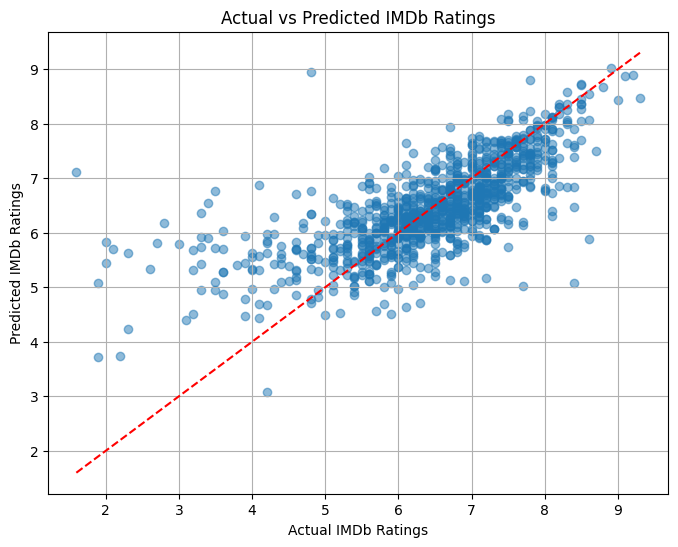

In [36]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted Ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.title('Actual vs Predicted IMDb Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.grid(True)
plt.show()

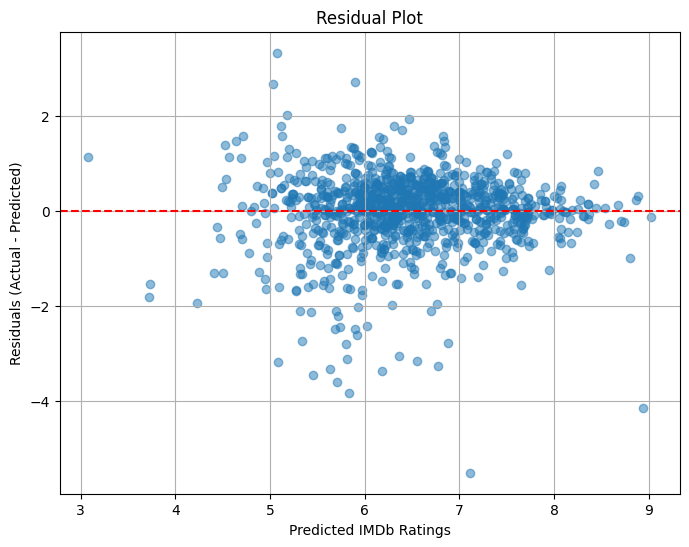

In [37]:
# Calculate residuals
residuals = y_test - y_pred_best

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.xlabel('Predicted IMDb Ratings')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.grid(True)
plt.show()

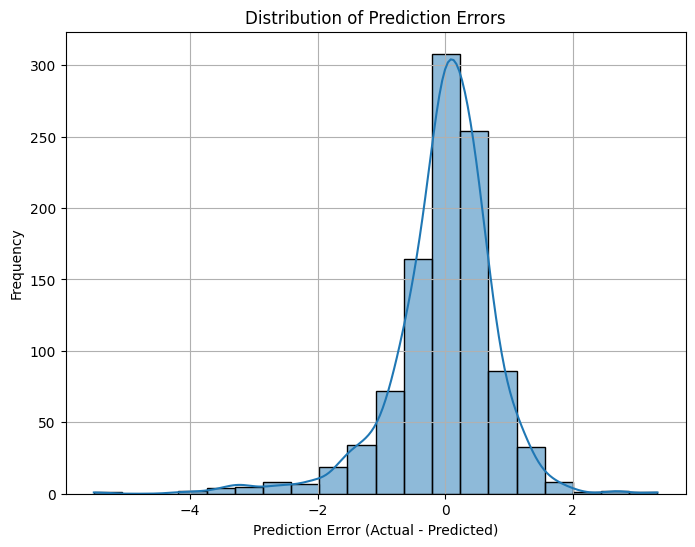

In [38]:
import seaborn as sns

# Distribution of prediction errors
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

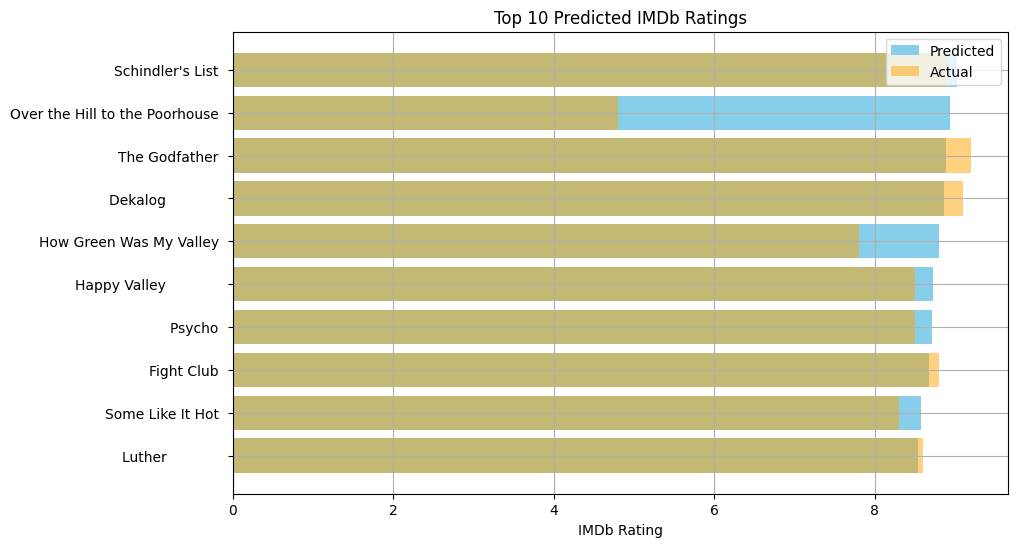

In [39]:
# Create a DataFrame with actual and predicted ratings
results_df = pd.DataFrame({
    'Movie': X_test['movie_title'],  # Replace 'movie_title' with the actual column name
    'Actual Rating': y_test,
    'Predicted Rating': y_pred_best
})

# Sort by predicted rating (top 10 movies)
top_predictions = results_df.sort_values(by='Predicted Rating', ascending=False).head(10)

# Bar plot of top predictions
plt.figure(figsize=(10, 6))
plt.barh(top_predictions['Movie'], top_predictions['Predicted Rating'], color='skyblue', label='Predicted')
plt.barh(top_predictions['Movie'], top_predictions['Actual Rating'], color='orange', alpha=0.5, label='Actual')
plt.xlabel('IMDb Rating')
plt.title('Top 10 Predicted IMDb Ratings')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.grid(True)
plt.show()

<ipython-input-40-57657f037111>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


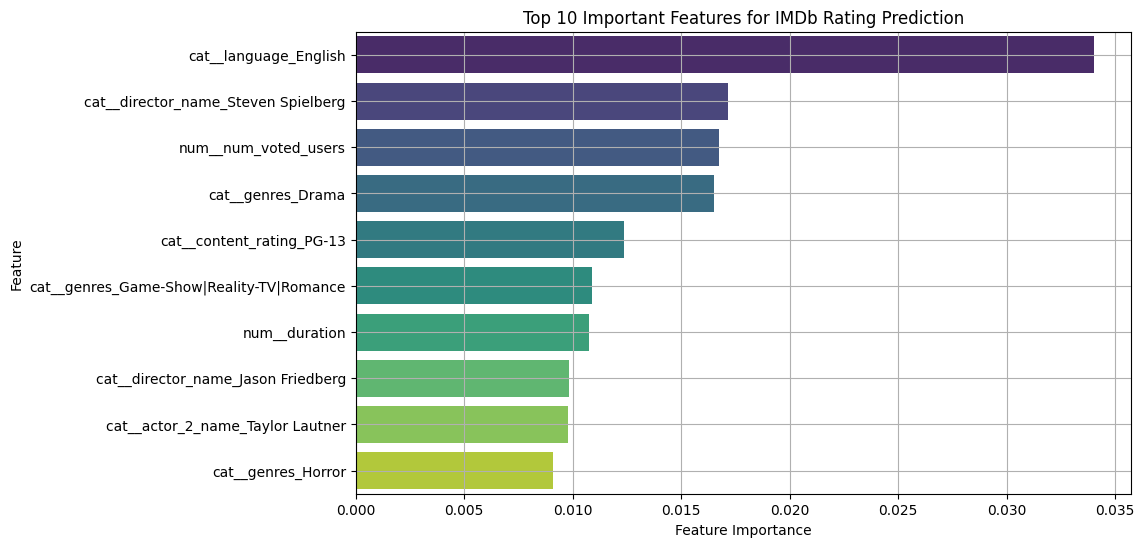

In [40]:
# Get feature importances from the model
feature_importances = best_model.named_steps['model'].feature_importances_

# Get feature names after preprocessing
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for IMDb Rating Prediction')
plt.grid(True)
plt.show()

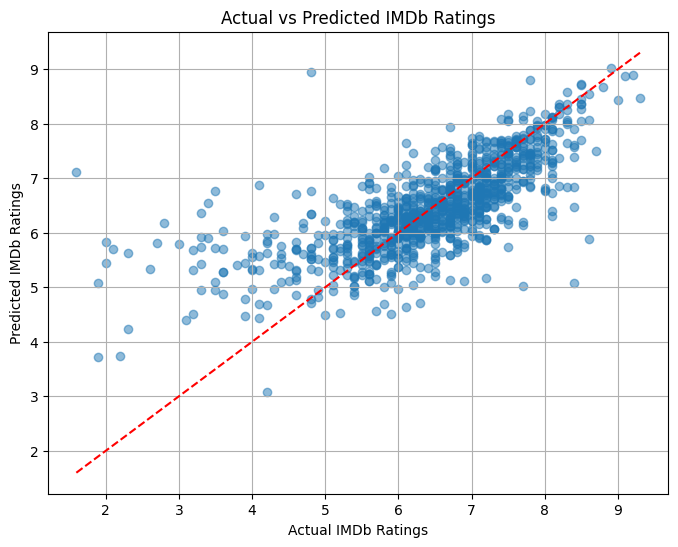

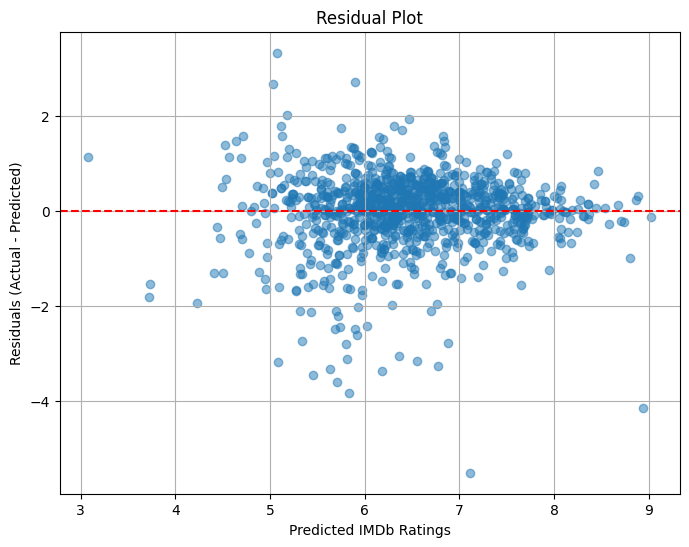

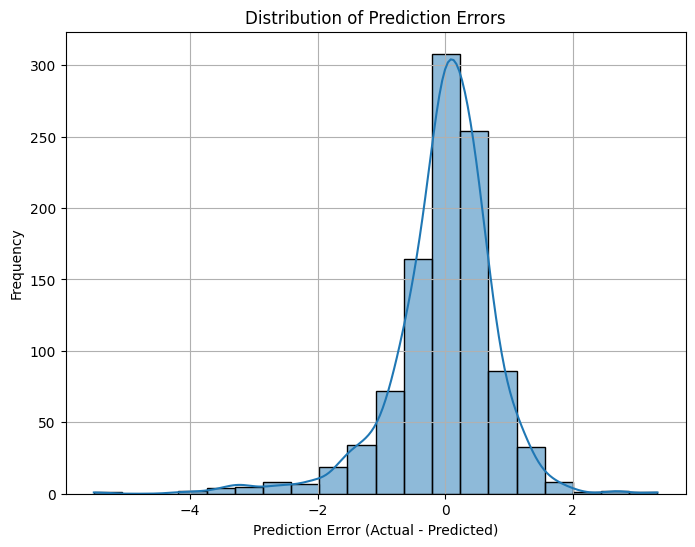

<ipython-input-41-5ab84ffed314>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


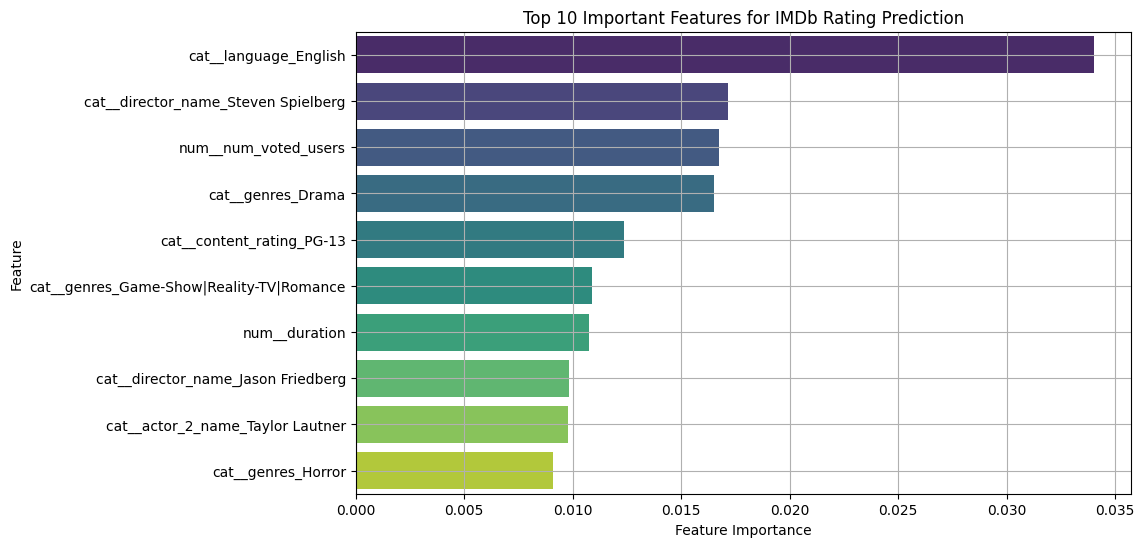

In [41]:
# 1. Actual vs Predicted Ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.title('Actual vs Predicted IMDb Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.xlabel('Predicted IMDb Ratings')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

# 3. Distribution of Prediction Errors
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

# 4. Feature Importance (if using XGBoost or Random Forest)
feature_importances = best_model.named_steps['model'].feature_importances_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for IMDb Rating Prediction')
plt.grid(True)
plt.show()